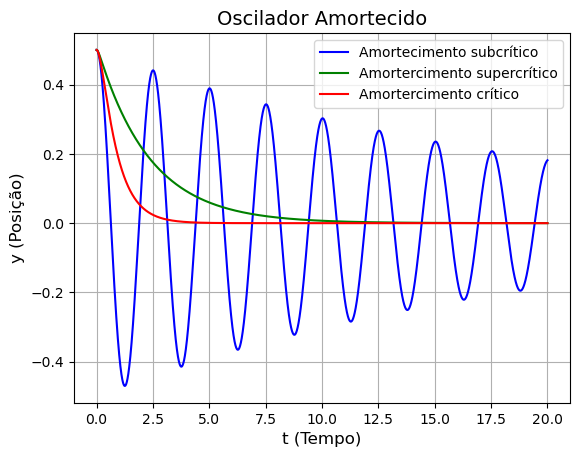

C:\Users\joaof\AppData\Local\Temp\ipykernel_22008\1554145898.py:100: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


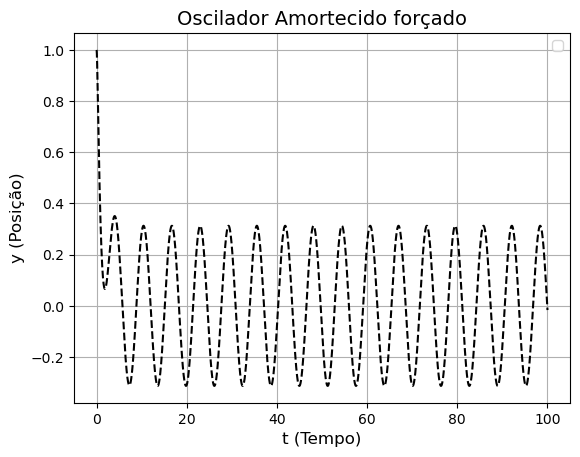

C:\Users\joaof\AppData\Local\Temp\ipykernel_22008\1554145898.py:60: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot(t, estacionaria, 'k--', linewidth=1, color = 'Black', label= 'Solução estacionária')  # Tracejado para solução estacionária
C:\Users\joaof\AppData\Local\Temp\ipykernel_22008\1554145898.py:61: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k:" (-> color='k'). The keyword argument will take precedence.
  plt.plot(t, transiente, 'k:', linewidth=1.5 , color = 'Red', label = 'Solução transiente')   # Pontilhado para transiente
C:\Users\joaof\AppData\Local\Temp\ipykernel_22008\1554145898.py:62: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(t, total, 'k-', linewidth=1.5, color = 'Blue', label =

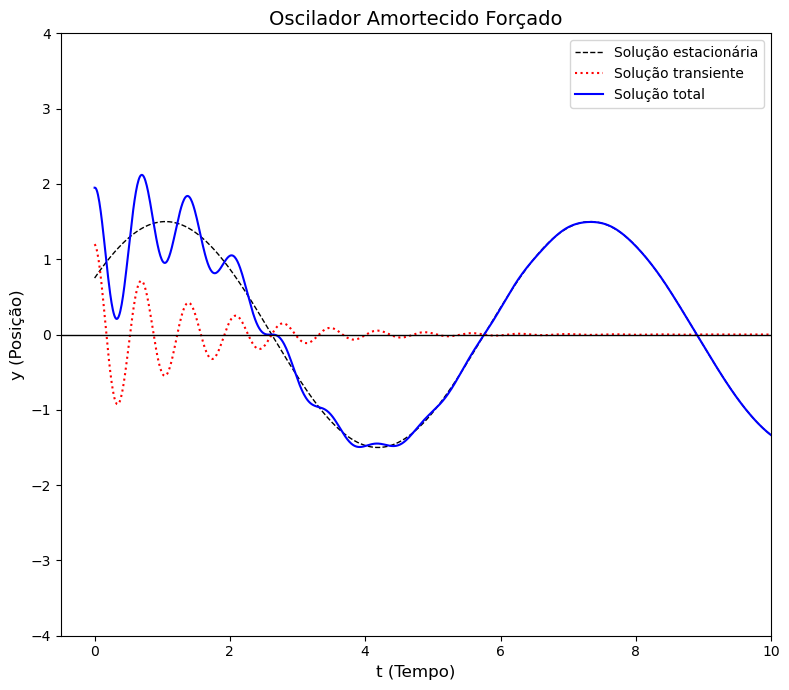

In [20]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

class OsciladorAmortecido():
    def __init__(self ,b ):
        self.b = b #parametro de amortecimento

    def oscilador_amortecido(self, t, y):
        omega_quadrado = 2*np.pi
        return (y[1], (-self.b * y[1] - omega_quadrado * y[0]))
    
    def oscilador_amortecido_forçado(self,t,y): #atividade extra proposta
        omega_quadrado = 2*np.pi
        F0= 3
        omega = 1
        return (y[1], (-self.b * y[1] - omega_quadrado * y[0] - F0*np.cos(omega*t))) #dy/dt = (v , -w^2 x - bv)
    

    def solver1(self):
        t = np.linspace(0, 20, 10000) 
        y = [0.5, 0]  # Condições iniciais: y(0)=1 e y'(0)=0
        solucao = solve_ivp(self.oscilador_amortecido, [0, 100], y0=y, t_eval=t, method='RK45')
        return solucao.t , solucao.y[0]
    
    def solver2(self):
        t = np.linspace(0, 100, 10000) 
        y = [1, 0]  # Condições iniciais: y(0)=0.1 e y'(0)=0
        solucao = solve_ivp(self.oscilador_amortecido_forçado, [0, 100], y0=y, t_eval=t, method='RK45')
        return solucao.t , solucao.y[0]

    def Moyses_figura(self):
        def solucao_transiente(self):
            """
            Método para gerar a solução transiente do oscilador amortecido forçado.
            A solução é composta por uma parte transiente e uma parte estacionária.
            A parte transiente decai rapidamente, enquanto a parte estacionária é a resposta forçada do sistema.
            A solução total é a soma dessas duas partes.   
         
            """
        # Parâmetros da solução
        gamma = 1.5  # Parâmetro de amortecimento
        omega_0 = 9  # Frequência natural (alta frequência)
        omega = 1.0    # Frequência de forçamento (ω << ω₀)
        B = 1.2      # Amplitude inicial
        phi_0 = 0  # Fase inicial
        A = 1.5        # Amplitude da solução estacionária
        t = np.linspace(0, 10, 1000)
        alpha = -np.pi/3
    
        # Solução transiente (oscilações livres amortecidas) 
        transiente = B * np.exp(-gamma * t / 2) * np.cos(omega_0 * t + phi_0)
        
        # Solução estacionária (senoidal simples)
        estacionaria = A * np.cos(omega * t + alpha)
        
        total = transiente + estacionaria
        
        plt.figure(figsize=(8, 7))
        plt.plot(t, estacionaria, 'k--', linewidth=1, color = 'Black', label= 'Solução estacionária')  # Tracejado para solução estacionária
        plt.plot(t, transiente, 'k:', linewidth=1.5 , color = 'Red', label = 'Solução transiente')   # Pontilhado para transiente
        plt.plot(t, total, 'k-', linewidth=1.5, color = 'Blue', label = 'Solução total')        # Linha sólida para solução total
        plt.axhline(y=0, color='k', linewidth=1) 
        plt.xlim(-0.5, 10)
        plt.ylim(-4.0, 4.0)
        plt.xlabel('t (Tempo)', fontsize=12)
        plt.ylabel('y (Posição)', fontsize=12)
        plt.title('Oscilador Amortecido Forçado', fontsize=14)
        plt.legend()
        plt.tight_layout()
        plt.show()

solucao1 = OsciladorAmortecido(0.1) #subcritco
t, y1 = solucao1.solver1()

solucao2 = OsciladorAmortecido(15) # supercritico
t, y2= solucao2.solver1()

solucao3 = OsciladorAmortecido(6) # supercrítico
t, y3= solucao3.solver1()

plt.plot(t, y1, color= 'Blue', label = 'Amortecimento subcrítico')
plt.plot(t,y2, color = 'green', label = 'Amortercimento supercrítico')
plt.plot(t,y3, color = 'red', label = 'Amortercimento crítico')
plt.title('Oscilador Amortecido', fontsize=14)
plt.xlabel('t (Tempo)', fontsize=12)
plt.ylabel('y (Posição)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

solucao3 = OsciladorAmortecido(8)
t, y4= solucao3.solver2()


plt.plot(t,y4, color= 'black' ,linestyle= '--'  )
plt.title('Oscilador Amortecido forçado', fontsize=14)
plt.xlabel('t (Tempo)', fontsize=12)
plt.ylabel('y (Posição)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

oscilador = OsciladorAmortecido(0.8)
oscilador.Moyses_figura()

